In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from kneed import KneeLocator


In [3]:

df = pd.read_csv('customer_analysis.csv',  sep='\t', index_col=0)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

In [5]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


In [7]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
mean_income = df['Income'].mean()
df['Income'].fillna(mean_income, inplace=True)

In [9]:
df.drop(['Z_Revenue', 'Z_CostContact'], axis=1, inplace=True)

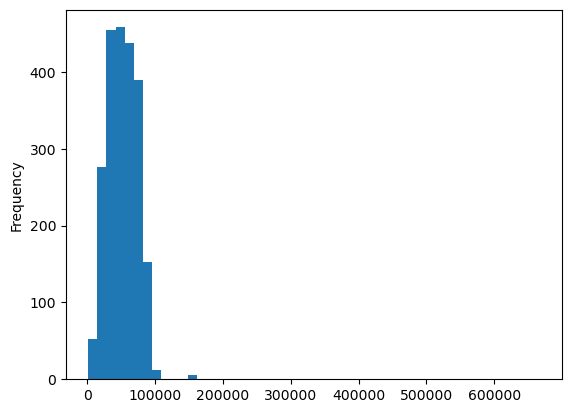

In [10]:
df['Income'].plot(kind='hist', bins=50)
plt.show()

In [11]:
# Programmatically drop outliers on Income
z_scores = np.abs((df['Income'] - df['Income'].mean()) / df['Income'].std())
threshold = 1.5  
# adjust this threshold as needed

# Filter out outliers
df = df[z_scores <= threshold]
df['Income'].describe()

count     2137.000000
mean     51660.550319
std      19035.041481
min      14796.000000
25%      36026.000000
50%      51569.000000
75%      67381.000000
max      89694.000000
Name: Income, dtype: float64

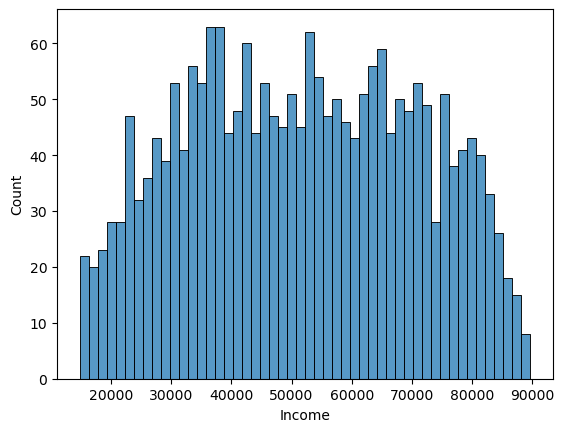

In [12]:
sns.histplot(data=df, x='Income', bins=50)
plt.show()

In [13]:
current_year = pd.to_datetime('today').year

df['Age'] = current_year - df['Year_Birth']
df.drop('Year_Birth', axis=1, inplace=True)

In [14]:
df['Age'].describe()


count    2137.000000
mean       54.429574
std        11.854921
min        28.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

In [15]:
df['TotalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']


In [16]:
df['TotalSpent'].describe()


count    2137.000000
mean      592.380908
std       581.884440
min         8.000000
25%        70.000000
50%       396.000000
75%      1021.000000
max      2524.000000
Name: TotalSpent, dtype: float64

In [17]:
df['isParent'] = (df['Kidhome'] + df['Teenhome']).apply(lambda x: 1 if x > 0 else 0)


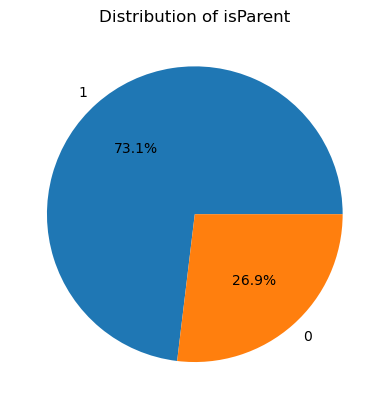

In [18]:
# Calculate the counts of each unique value in the 'isParent' column
counts = df['isParent'].value_counts()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
ax.set_title('Distribution of isParent')

# Show the plot
plt.show()

In [19]:
df['totalChildren'] = df['Kidhome'].add(df['Teenhome'])
df = df.drop(['Kidhome', 'Teenhome'], axis=1)


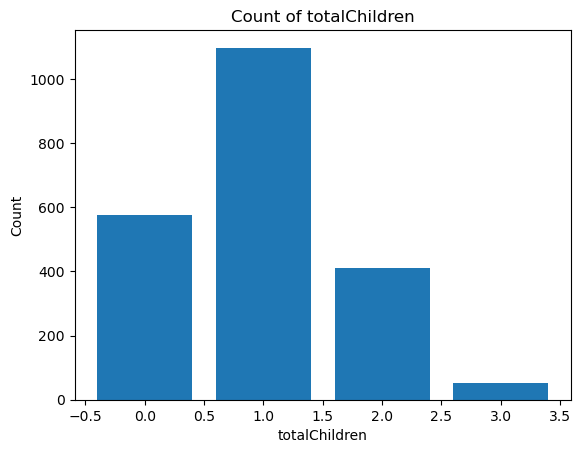

In [20]:
# Calculate the counts of each unique value in the 'totalChildren' column
counts = df['totalChildren'].value_counts()

plt.bar(counts.index, counts)
plt.xlabel('totalChildren')
plt.ylabel('Count')
plt.title('Count of totalChildren')
plt.show()

In [21]:
df['Marital_Status'].value_counts()


Married     829
Together    556
Single      447
Divorced    221
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [22]:
marital_mapping = {
    "Married": 2,
    "Together": 2,
    "Divorced": 1,
    "Single": 1,
    "Widow": 1,
    "Alone": 1,
    "Absurd": 1,
    "YOLO": 1
}

df['familySize'] = df['Marital_Status'].map(marital_mapping) + df['totalChildren']


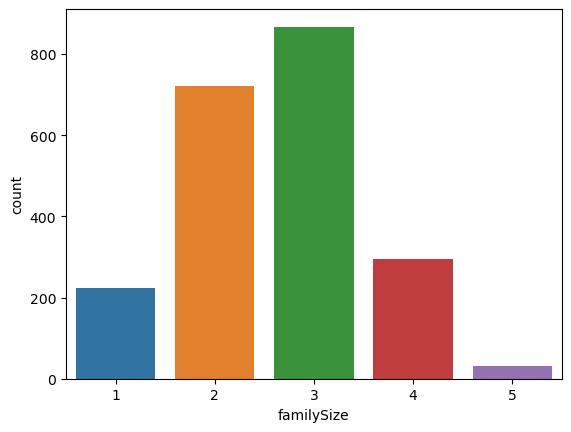

In [23]:
sns.countplot(x='familySize', data=df)
plt.show()

In [24]:
df['EnrollDate'] = df['Dt_Customer'].dt.day
df['EnrollMonth'] = df['Dt_Customer'].dt.month
df['EnrollYear'] = df['Dt_Customer'].dt.year
df.drop('Dt_Customer', axis=1, inplace=True)


In [25]:
education_mapping = {
    "Basic": 0,
    "2n Cycle": 1,
    "Graduation": 1,
    "Master": 2,
    "PhD": 2
}


df['Education'] = df['Education'].map(education_mapping)


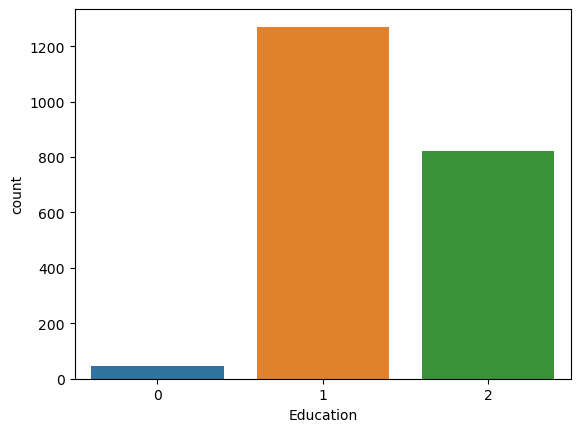

In [26]:
sns.countplot(x='Education', data=df)
plt.show()

In [27]:
marital_mapping = {
    "Married": 0,
    "Together": 0,
    "Divorced": 1,
    "Single": 1,
    "Widow": 1,
    "Alone": 2,
    "Absurd": 2,
    "YOLO": 2
}

df['Marital_Status'] = df['Marital_Status'].map(marital_mapping)


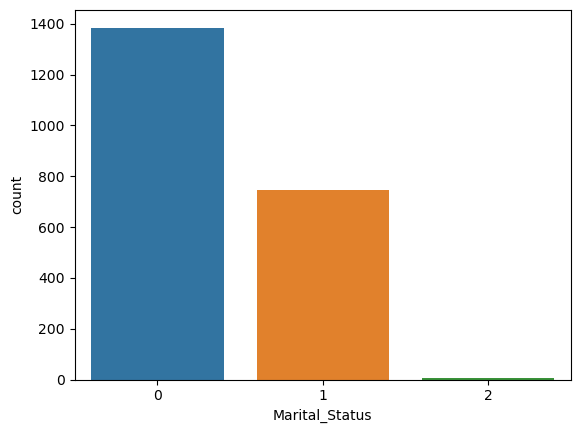

In [28]:
sns.countplot(x='Marital_Status', data=df)
plt.show()

In [30]:
scaler = StandardScaler()
scaler.fit(df)

scaled_df = pd.DataFrame(scaler.transform(df), columns=df.columns, index=df.index)
scaled_df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Response,Age,TotalSpent,isParent,totalChildren,familySize,EnrollDate,EnrollMonth,EnrollYear
ID,,,,,,,,,,,,,,,,,,,,,
5524,-0.695234,1.328555,0.340370,0.305023,1.016666,1.580594,1.873866,2.497865,1.545260,0.859395,...,-0.099621,2.455525,0.976230,1.761276,-1.648187,-1.301234,-1.802503,-1.332176,0.724332,-1.502735
2174,-0.695234,1.328555,-0.279369,-0.386285,-0.879451,-0.635262,-0.740009,-0.647791,-0.633300,-0.736401,...,-0.099621,-0.407245,1.229349,-0.971865,0.606727,1.375125,0.422128,-0.876186,-1.003554,1.424653
4141,-0.695234,-0.731766,1.048441,-0.801069,0.381589,0.587279,-0.154307,1.369130,-0.132481,-0.035807,...,-0.099621,-0.407245,0.301247,0.315633,-1.648187,-1.301234,-0.690188,0.605782,0.436351,-0.039041
6182,-0.695234,-0.731766,-1.314439,-0.801069,-0.879451,-0.558854,-0.672242,-0.499760,-0.583218,-0.755862,...,-0.099621,-0.407245,-1.301838,-0.927172,0.606727,0.036946,0.422128,-0.648191,-1.291535,1.424653
5324,1.216883,-0.731766,0.348515,1.549376,-0.387190,0.434461,-0.197872,0.166379,0.017764,-0.561252,...,-0.099621,-0.407245,-1.048719,-0.292877,0.606727,0.036946,0.422128,0.377787,-1.579516,1.424653


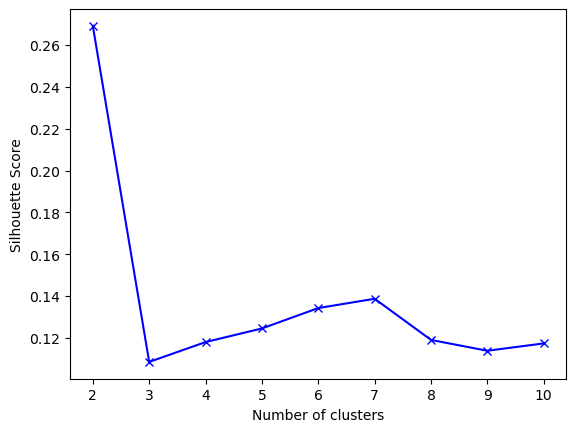

In [32]:
silhouette_scores = []

for i in range(2, 11):  # starts from 2 because silhouette_score needs at least 2 clusters
    model = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='ward')
    labels = model.fit_predict(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df, labels))

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [34]:
clusters_range = range(2, 11)

knee_locator = KneeLocator(clusters_range, silhouette_scores, curve='convex', direction='decreasing')

print("The optimal number of clusters is:", knee_locator.elbow)


The optimal number of clusters is: 3


In [35]:
model = AgglomerativeClustering(n_clusters=knee_locator.elbow, metric='euclidean', linkage='ward')
labels = model.fit_predict(scaled_df)
df['Cluster'] = labels
df.head()


,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age,TotalSpent,isParent,totalChildren,familySize,EnrollDate,EnrollMonth,EnrollYear,Cluster
ID,,,,,,,,,,,,,,,,,,,,,
5524,1,1,58138.0,58,635,88,546,172,88,88,...,1,66,1617,0,0,1,4,9,2012,0
2174,1,1,46344.0,38,11,1,6,2,1,6,...,0,69,27,1,2,3,8,3,2014,1
4141,1,0,71613.0,26,426,49,127,111,21,42,...,0,58,776,0,0,2,21,8,2013,1
6182,1,0,26646.0,26,11,4,20,10,3,5,...,0,39,53,1,1,3,10,2,2014,1
5324,2,0,58293.0,94,173,43,118,46,27,15,...,0,42,422,1,1,3,19,1,2014,2


In [36]:
df.groupby('Cluster').agg(count=('Cluster', 'count'), 
                          Income=('Income', 'mean'),
                          MntWines=('MntWines', 'mean'),
                          MntFruits=('MntFruits', 'mean'),
                          MntMeatProducts=('MntMeatProducts', 'mean'),
                          MntFishProducts=('MntFishProducts', 'mean'),
                          NumDealsPurchases=('NumDealsPurchases', 'mean'),
                          NumWebPurchases=('NumWebPurchases', 'mean'),
                          NumCatalogPurchases=('NumCatalogPurchases', 'mean'),
                          NumStorePurchases=('NumStorePurchases', 'mean'),
                          NumWebVisitsMonth=('NumWebVisitsMonth', 'mean'),
                          Age=('Age', 'mean'),
                          TotalSpent=('TotalSpent', 'mean'), 
                          isParent=('isParent', 'mean'),
                          TotalChildren=('totalChildren', 'mean'),
                          FamilySize=('familySize', 'mean'),
                          EnrollYear=('EnrollYear', 'mean'),
                          )


,count,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,TotalSpent,isParent,TotalChildren,FamilySize,EnrollYear
Cluster,,,,,,,,,,,,,,,,,
0,454,74615.645940,635.297357,60.524229,449.200441,91.389868,1.292952,4.885463,5.740088,8.176211,2.887665,55.248899,1374.455947,0.136564,0.162996,1.781938,2013.017621
1,866,36463.988181,52.645497,7.004619,32.055427,10.675520,1.836028,2.252887,0.612009,3.526559,6.185912,52.237875,125.310624,0.832564,1.165127,2.806005,2013.160508
2,817,55012.581409,376.970624,26.798042,131.977968,34.701346,3.451652,5.596083,2.941248,6.982864,5.776010,56.297430,652.871481,0.953488,1.217870,2.889841,2012.889841


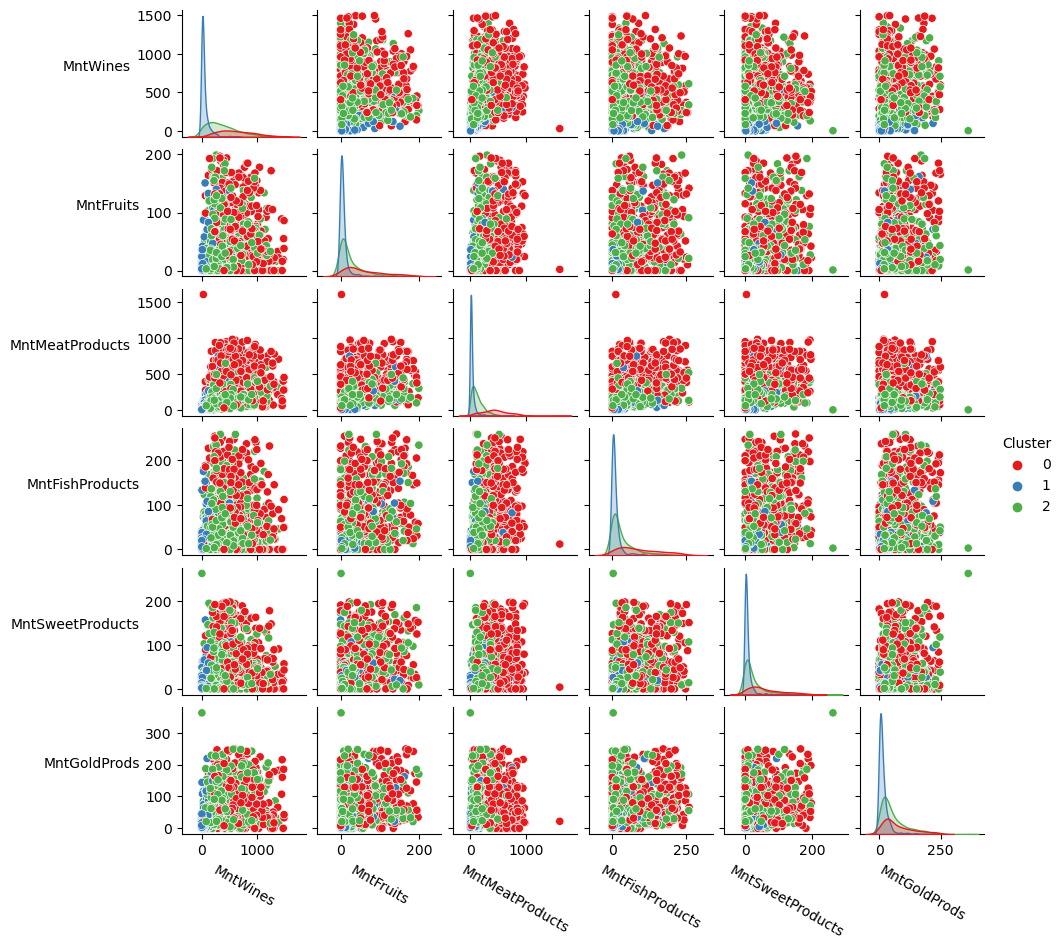

In [37]:
f = sns.pairplot(df[['Cluster', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']], hue='Cluster', palette='Set1', height=1.5)
for ax in f.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=-30)
    ax.set_ylabel(ax.get_ylabel(), rotation=0)
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()


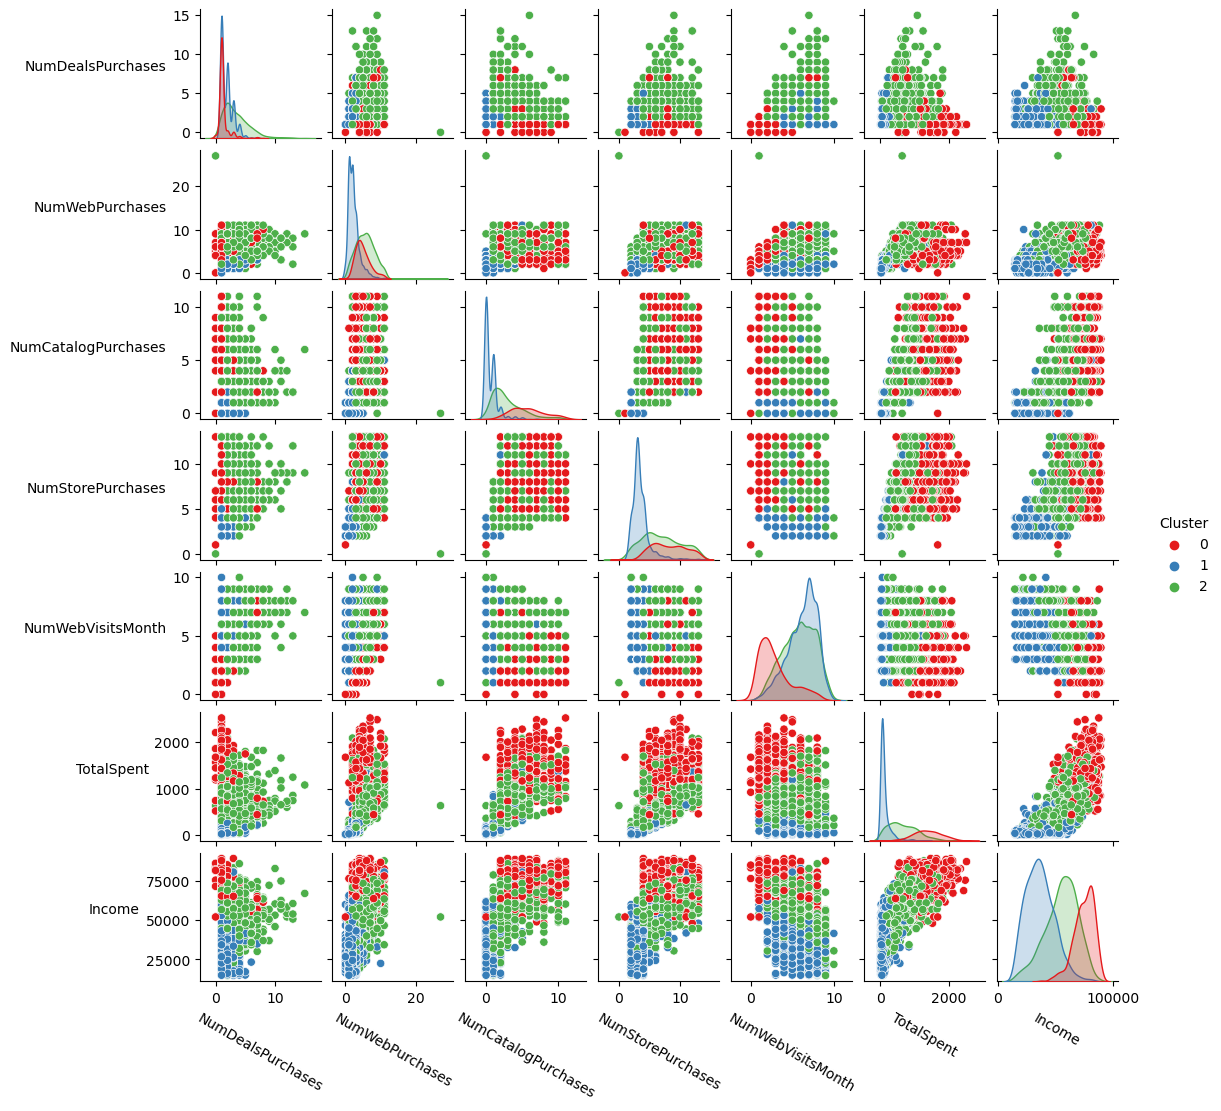

In [38]:
f = sns.pairplot(df[['Cluster', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'TotalSpent', 'Income']], hue='Cluster', palette='Set1', height=1.5)
for ax in f.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=-30)
    ax.set_ylabel(ax.get_ylabel(), rotation=0)
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()


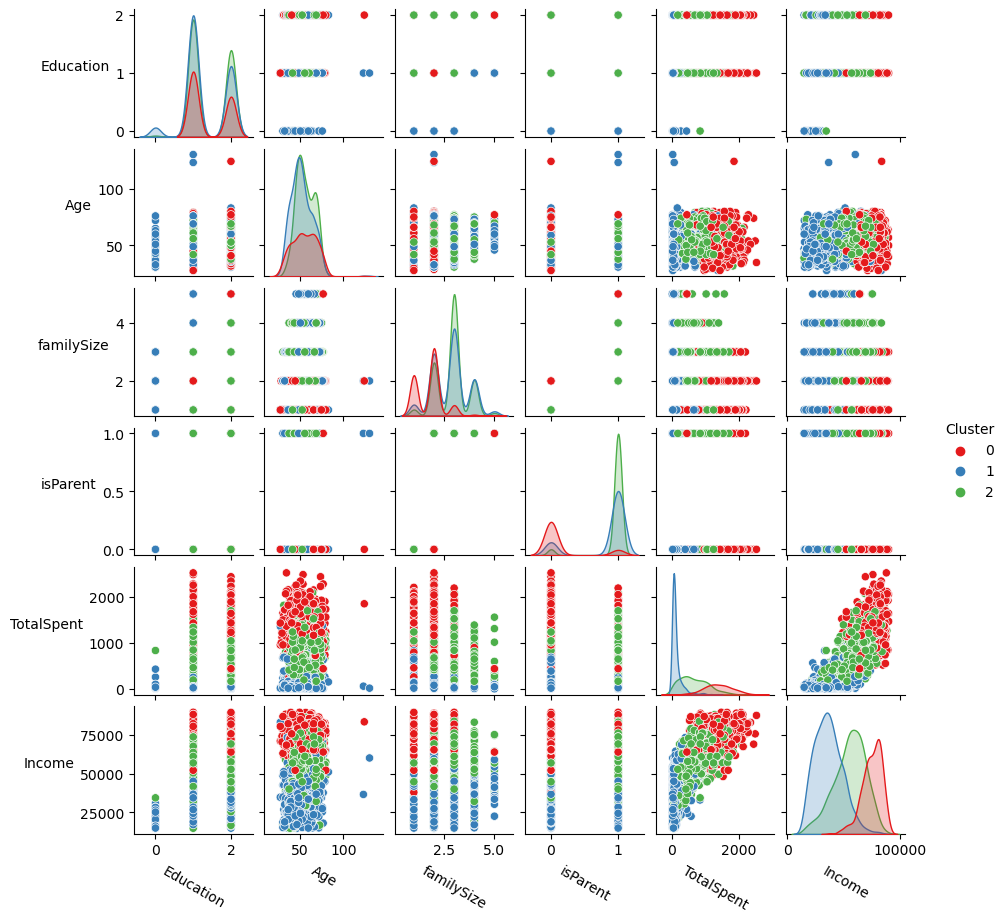

In [39]:
f = sns.pairplot(df[['Cluster', 'Education', 'Age', 'familySize', 'isParent', 'TotalSpent', 'Income']], hue='Cluster', palette='Set1', height=1.5)
for ax in f.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=-30)
    ax.set_ylabel(ax.get_ylabel(), rotation=0)
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()


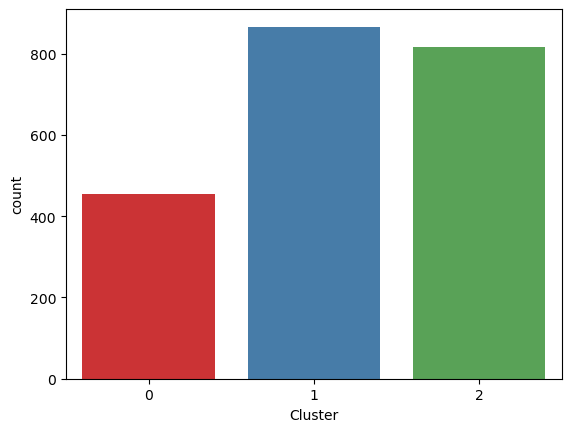

In [40]:
sns.countplot(x='Cluster', data=df, palette='Set1')
plt.show()


In [41]:
df.groupby('Cluster')[['TotalSpent', 'Income']].describe().transpose()


Cluster                      0             1             2
TotalSpent count    454.000000    866.000000    817.000000
           mean    1374.455947    125.310624    652.871481
           std      422.913323    176.191217    422.638276
           min       46.000000      8.000000     12.000000
           25%     1097.000000     38.000000    312.000000
           50%     1366.000000     63.000000    599.000000
           75%     1657.250000    133.000000    946.000000
           max     2524.000000   1376.000000   2092.000000
Income     count    454.000000    866.000000    817.000000
           mean   74615.645940  36463.988181  55012.581409
           std     8826.284891  12206.414010  14062.687163
           min    37929.000000  14849.000000  14796.000000
           25%    69487.000000  27159.500000  46098.000000
           50%    75809.500000  35533.500000  56386.000000
           75%    81315.000000  44314.250000  65106.000000
           max    89694.000000  83257.000000  88194.000000

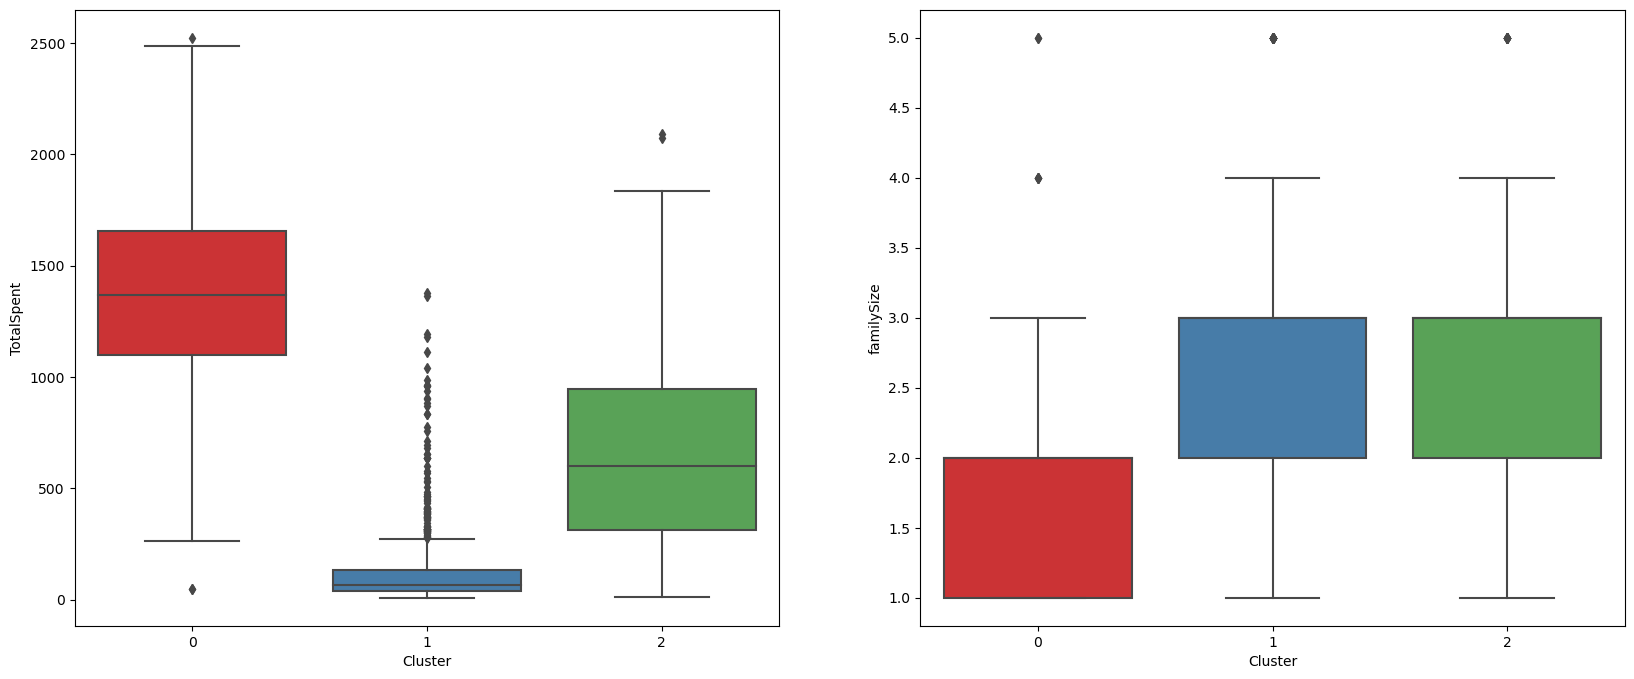

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.boxplot(x='Cluster', y='TotalSpent', data=df, ax=ax[0], palette='Set1')
sns.boxplot(x='Cluster', y='familySize', data=df, ax=ax[1], palette='Set1')
plt.show()


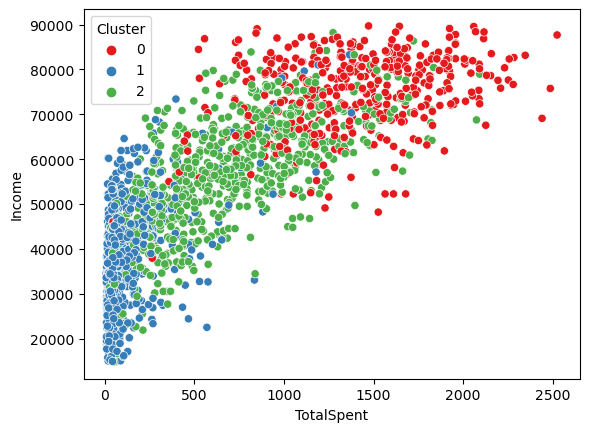

In [43]:
sns.scatterplot(x='TotalSpent', y='Income', hue='Cluster', data=df, palette='Set1')
plt.show()


CONCLUSION
There are three clusters, and within these clusters, cluster "1" stands out for having the most customers but also the lowest average total spending and income. On the other hand, cluster "0" boasts the highest average total spending and income, despite having the smallest family size. This suggests a correlation between family size and total spending, indicating that larger family sizes are associated with lower total spending, and vice versa.
